<a href="https://colab.research.google.com/github/mitesh98/Quora_Question_Pair_Similarity/blob/master/Quora_Question_Pair_Similarity_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
##import distance
# you can write your own dp code for this
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
##from fuzzywuzzy import fuzz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "/content/drive/My Drive/Colab Notebooks/quora_adv_feature .csv" "quora_adv_feature .csv"

In [ ]:
data=pd.read_csv('quora_adv_feature .csv')
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,clean_que_1,clean_que_2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,step step guid invest share market india,step step guid invest share market,0.999980,0.833319,0.0,0.0,0.833319,0.714276,0,1,1,6.5,100,93,93,98,0.965517
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...,0.799984,0.399996,0.0,0.0,0.799984,0.399996,0,0,5,7.5,86,63,66,73,0.442308
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0,increas speed internet connect use vpn,internet speed increas hack dns,0.599988,0.499992,0.0,0.0,0.599988,0.499992,0,0,1,5.5,63,63,43,41,0.150000
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0,mental lone solv,find remaind math math divid,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0,0,2,4.0,28,24,9,20,0.039216
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2,one dissolv water quik sugar salt methan carbo...,fish would surviv salt water,0.399992,0.199998,0.0,0.0,0.399992,0.199998,0,0,5,7.5,67,47,35,54,0.150000


In [ ]:
data.shape


(100000, 34)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    100000 non-null  int64  
 1   qid1                  100000 non-null  int64  
 2   qid2                  100000 non-null  int64  
 3   question1             100000 non-null  object 
 4   question2             100000 non-null  object 
 5   is_duplicate          100000 non-null  int64  
 6   freq_qid1             100000 non-null  int64  
 7   freq_qid2             100000 non-null  int64  
 8   q1len                 100000 non-null  int64  
 9   q2len                 100000 non-null  int64  
 10  q1_n_words            100000 non-null  int64  
 11  q2_n_words            100000 non-null  int64  
 12  word_Common           100000 non-null  float64
 13  word_Total            100000 non-null  float64
 14  word_share            100000 non-null  float64
 15  f

# 3.5.1 Analysis of extracted features



In [ ]:
df_adv_feat = pd.read_csv("quora_adv_feature .csv")

In [ ]:
print("Shape of dataframe after applying advance feature engineering:\n")
print(df_adv_feat.shape, '\n')
print('*'*50, '\n')
print("Columns of df_adv_feat are:\n")
print(df_adv_feat.columns)

Shape of dataframe after applying advance feature engineering:

(100000, 34) 

************************************************** 

Columns of df_adv_feat are:

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'clean_que_1', 'clean_que_2', 'cwc_min', 'cwc_max', 'csc_min',
       'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq',
       'abs_len_diff', 'mean_len', 'token_set_ratio', 'token_sort_ratio',
       'fuzz_ratio', 'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')


In [ ]:
df_dup = df_adv_feat[df_adv_feat.is_duplicate == 1]
df_non_dup = df_adv_feat[df_adv_feat.is_duplicate == 0]

print("Values under is_duplicate column:")
print(df_adv_feat.is_duplicate.value_counts(), '\n')
print("*"*50, '\n')
print("Number of questions under class 1 (duplicate pairs):", df_dup.is_duplicate.count() * 2)
print("Number of questions under class 0 (non-duplicate pairs):", df_non_dup.is_duplicate.count() * 2)

Values under is_duplicate column:
0    62728
1    37272
Name: is_duplicate, dtype: int64 

************************************************** 

Number of questions under class 1 (duplicate pairs): 74544
Number of questions under class 0 (non-duplicate pairs): 125456


<b>Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio']<b>

In [ ]:
n = df_adv_feat.shape[0]

In [ ]:
n

100000

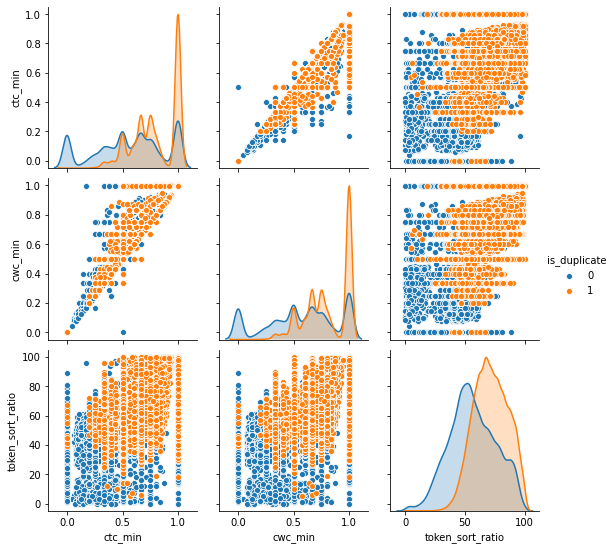

In [ ]:
import seaborn as sns
import pandas as pd
df_adv_feat = pd.read_csv("quora_adv_feature .csv")
n = df_adv_feat.shape[0]
sns.pairplot(df_adv_feat[['ctc_min', 'cwc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue = 'is_duplicate', vars = ['ctc_min', 'cwc_min', 'token_sort_ratio'])

# Observation:
    
We can see that maximum questions are well separable based on 'ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio' values.

<b>Distribution plot for token_sort_ration<b>

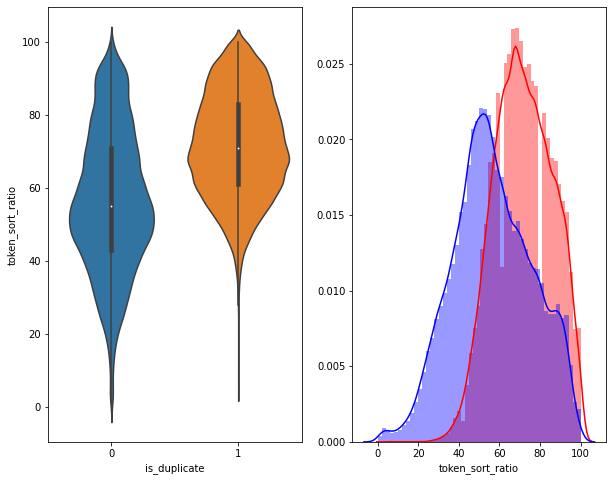

In [ ]:
# Distribution of the token_sort_ratio

plt.figure(figsize = (10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = df_adv_feat.is_duplicate, y = df_adv_feat.token_sort_ratio)

plt.subplot(1,2,2)
sns.distplot(df_adv_feat[df_adv_feat.is_duplicate == 1.0].token_sort_ratio, label = "1", color = 'red')
sns.distplot(df_adv_feat[df_adv_feat.is_duplicate == 0.0].token_sort_ratio, label = "0" , color = 'blue' )

# Observation:

Based on token_sort_ratio values, questions are separable good but not best.

<b>Distribution plot for fuzz ratio<b>

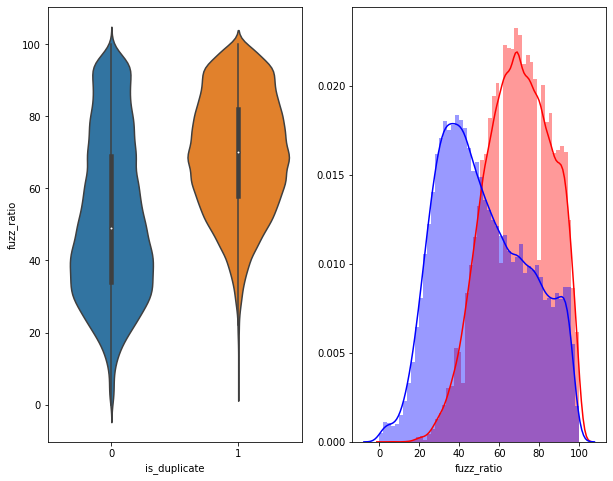

In [ ]:
# Distribution plot for fuzz ratio

plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = df_adv_feat.is_duplicate, y = df_adv_feat.fuzz_ratio)

plt.subplot(1,2,2)
sns.distplot(df_adv_feat[df_adv_feat.is_duplicate == 1.0].fuzz_ratio, label = "1", color = 'red')
sns.distplot(df_adv_feat[df_adv_feat.is_duplicate == 0.0].fuzz_ratio, label = "0" , color = 'blue' )

# Observation:

Based on fuzz ratio values, questions are separable good but not best.

# T-SNE visualization

We have 15 features such as 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len', 'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio', 'fuzz_partial_ratio', 'longest_substr_ratio'.

We will now use all these 15 features to visuzalize using T-SNE with 2-d plot.

In [ ]:
df_adv_feat = pd.read_csv("quora_adv_feat.csv")

In [ ]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df_adv_feat[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

# Defining 'dim' function to get d-dimension visualisation

In [ ]:
# Importing TSNE library
from sklearn.manifold import TSNE

def dim(d, x, y):
    
    tsne = TSNE(n_components = d, init = 'random', random_state = 101,
            method = 'barnes_hut', n_iter = 1000, verbose = 2, angle = 0.5)

    # Fit_transform
    tsne = tsne.fit_transform(X)
    
    df_t = pd.DataFrame({'x' : tsne[:,0], 'y' : tsne[:,1] ,'label' : y})

    # draw the plot in appropriate place in the grid
    sns.lmplot(data = df_t, x = 'x', y = 'y', hue = 'label', fit_reg = False, size = 8, palette = "Set1", markers = ['s','o'])
    plt.title("perplexity : {} and max_iter : {}".format(30, 1000))

# Calling 'dim' function to get 2-dimension visualisation

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.025s...
[t-SNE] Computed neighbors for 5000 samples in 0.389s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.096749
[t-SNE] Computed conditional probabilities in 0.291s
[t-SNE] Iteration 50: error = 81.2795258, gradient norm = 0.0521198 (50 iterations in 2.123s)
[t-SNE] Iteration 100: error = 69.6493149, gradient norm = 0.0086898 (50 iterations in 1.382s)
[t-SNE] Iteration 150: error = 67.5727234, gradient norm = 0.0063278 (50 iterations in 1.272s)
[t-SNE] Iteration 200: error = 66.6859207, gradient norm = 0.0043966 (50 iterations in 1.250s)
[t-SNE] Iteration 250: error = 66.1827850, gradient norm = 0.0037964

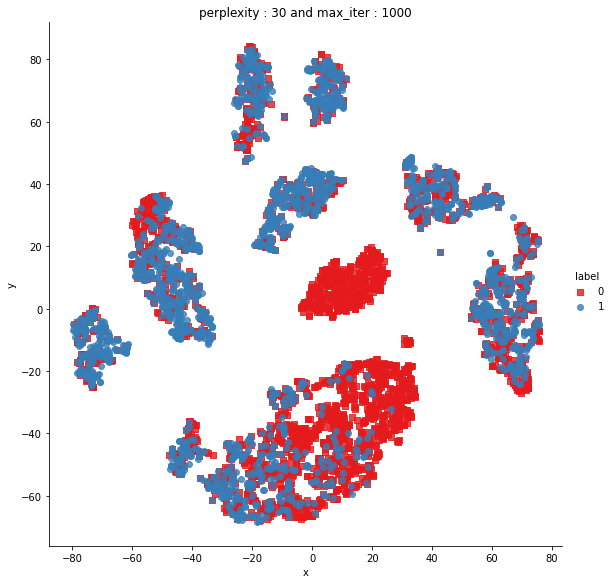

In [ ]:
# Calling 'dim' function to get 2-dimension visualisation

dim(2, X, y)

# Observation:

From the 2 dimension view, we can see that top red color is well separated from blue. Which means dissimilar questions are well separated from similar questions.

# Calling 'dim' function to get 3-dimension visualisation

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.019s...
[t-SNE] Computed neighbors for 5000 samples in 0.394s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.096749
[t-SNE] Computed conditional probabilities in 0.264s
[t-SNE] Iteration 50: error = 80.9980545, gradient norm = 0.0363322 (50 iterations in 7.873s)
[t-SNE] Iteration 100: error = 68.2420349, gradient norm = 0.0038380 (50 iterations in 3.571s)
[t-SNE] Iteration 150: error = 66.7412109, gradient norm = 0.0017636 (50 iterations in 3.147s)
[t-SNE] Iteration 200: error = 66.1479034, gradient norm = 0.0012969 (50 iterations in 3.161s)
[t-SNE] Iteration 250: error = 65.7878723, gradient norm = 0.0010292

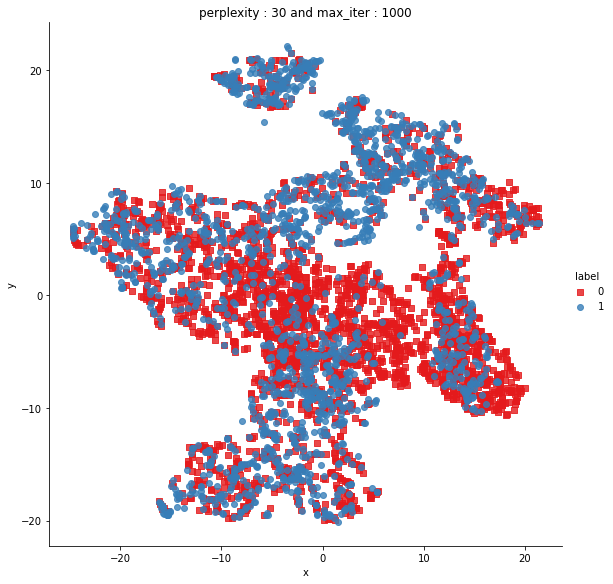

In [ ]:

# Calling 'dim' function to get 3-dimension visualisation

dim(3, X, y)

# Observation:
    
3 dimension view is not as good as 2 dimension view. Dissimilar and similar questions are not well separated as in case of 2 dimensional view.

# Displaying all dataframes columns

# Dropping out few columns and merge the remaining columns

In [ ]:
print("Shape of merged dataset:", df_adv_feat.shape, '\n')
print('*'*50,'\n')
print("Columns of merged dataset\n")
print(df_adv_feat.columns)

Shape of merged dataset: (100000, 34) 

************************************************** 

Columns of merged dataset

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'clean_que_1', 'clean_que_2', 'cwc_min', 'cwc_max', 'csc_min',
       'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq',
       'abs_len_diff', 'mean_len', 'token_set_ratio', 'token_sort_ratio',
       'fuzz_ratio', 'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')


In [ ]:
df_final= df_adv_feat.drop(['qid1', 'qid2','clean_que_1', 'clean_que_2'], axis = 1)


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    100000 non-null  int64  
 1   question1             100000 non-null  object 
 2   question2             100000 non-null  object 
 3   is_duplicate          100000 non-null  int64  
 4   freq_qid1             100000 non-null  int64  
 5   freq_qid2             100000 non-null  int64  
 6   q1len                 100000 non-null  int64  
 7   q2len                 100000 non-null  int64  
 8   q1_n_words            100000 non-null  int64  
 9   q2_n_words            100000 non-null  int64  
 10  word_Common           100000 non-null  float64
 11  word_Total            100000 non-null  float64
 12  word_share            100000 non-null  float64
 13  freq_q1+q2            100000 non-null  int64  
 14  freq_q1-q2            100000 non-null  int64  
 15  c

In [ ]:
df_final.to_csv('Quora_Fianl.csv', index=False)